In [1]:
import os
os.chdir('../')

In [2]:
from viz.utils import *

from main import run_app

In [4]:
train_dir='data/synthetic/train/'
test_dir='data/synthetic/test/'
configs={
    # Model configs
    'layer_sizes': [60, 10], 'act_funcs': ['softmax'],
    'dataset_name': 'synthetic',
    'method_name': 'QFedAvgServer',
    # Server configs
    'num_rounds': 2000,
    'pct_client_per_round': 0.1,
    'num_epochs': 1,
    'batch_size': 10,
    'lr': 0.1,
    'q': 0
}

server, clients = run_app(train_dir, test_dir, configs)

100%|██████████| 2000/2000 [03:19<00:00, 10.03it/s]


In [5]:
df = get_results_from_server(server)

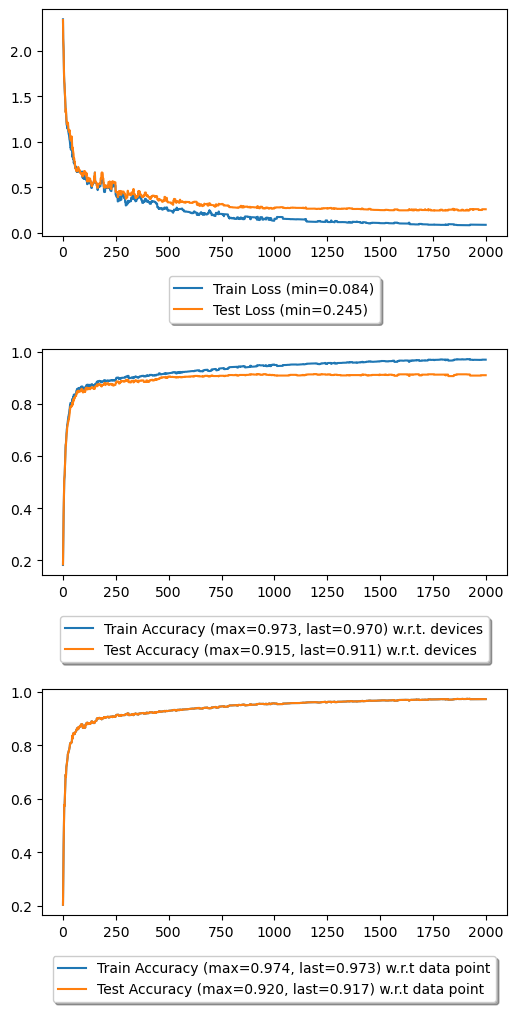

In [6]:
g = plot_by_round(df)

# Benchmark

In [16]:
train_dir='data/synthetic/train/'
test_dir='data/synthetic/test/'
configs={
    # Model configs
    'layer_sizes': [60, 10], 'act_funcs': ['softmax'],
    'dataset_name': 'synthetic',
    'method_name': 'QFedAvgServer',
    # Server configs
    'num_rounds': 2000,
    'pct_client_per_round': 0.1,
    'num_epochs': 1,
    'batch_size': 10,
    'lr': 0.1
}

# q=0

In [17]:
# q=0
configs['q'] = 0
server_q0, clients_q_0 = run_app(train_dir, test_dir, configs, report=False)

100%|██████████| 2000/2000 [03:33<00:00,  9.36it/s]


In [18]:
res_q0 = {
    'q': 0
}
q0_resdf = get_results_from_server(server_q0)
res_q0.update(fairness_result(q0_resdf))

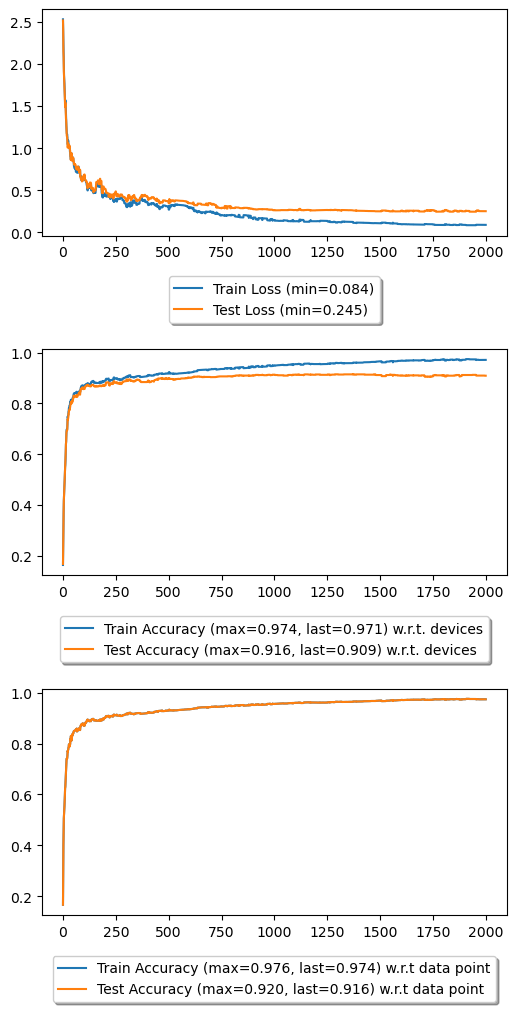

In [19]:
_ = plot_by_round(q0_resdf)

# q=1

In [21]:
# q=1
configs['q'] = 1.0
server_q1, clients_q1 = run_app(train_dir, test_dir, configs, report=False)

100%|██████████| 2000/2000 [03:38<00:00,  9.14it/s]


In [22]:
res_q1 = {
    'q': 1.0
}
q1_resdf = get_results_from_server(server_q1)
res_q1.update(fairness_result(q1_resdf))

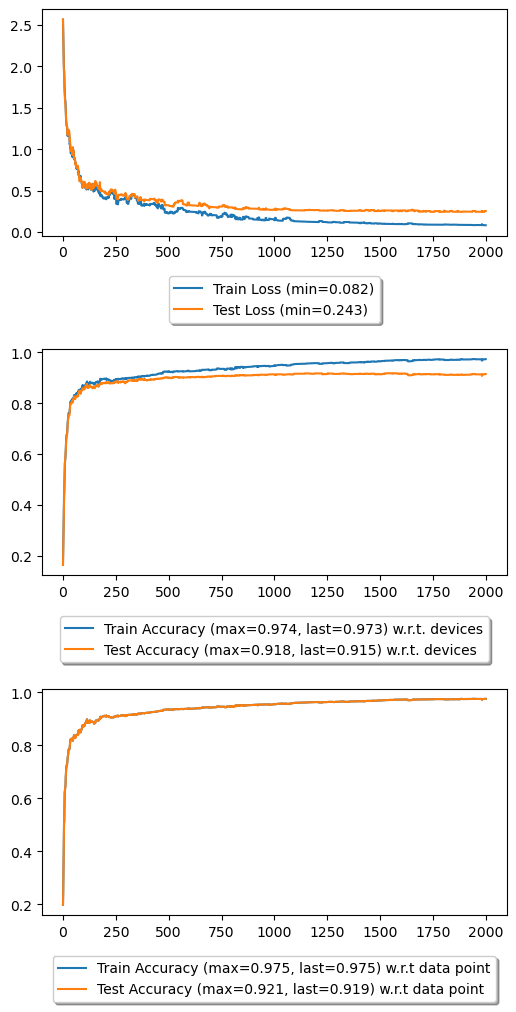

In [23]:
_ = plot_by_round(q1_resdf)

In [24]:
resdf = pd.DataFrame([res_q0, res_q1])

In [25]:
resdf

,q,subset,avg_acc,worst_10,best_10,variance
0,0.0,test,90.415326,58.277930,100.0,191.008011
1,1.0,test,90.537822,62.479611,100.0,157.033196


In [15]:
resdf

,q,subset,avg_acc,worst_10,best_10,variance
0,0.0,test,91.753069,62.501374,100.0,152.65221
1,0.1,test,91.731168,62.501374,100.0,152.65221


# Tuning q

In [11]:
train_dir='data/synthetic/train/'
test_dir='data/synthetic/test/'
configs={
    # Model configs
    'layer_sizes': [60, 10], 'act_funcs': ['softmax'],
    'dataset_name': 'synthetic',
    'method_name': 'QFedAvgServer',
    # Server configs
    'num_rounds': 2000,
    'pct_client_per_round': 0.1,
    'num_epochs': 1,
    'batch_size': 10,
    'lr': 0.1
}

In [12]:
res_all = []
for q in [0, 0.001, 0.01, 0.1, 0.5, 1, 2.5, 5, 10, 15]: # 0.001, 0.01, 0.1, 0.5, 1, 2.5, 5, 10, 15
    for lr in [0.001, 0.01, 0.1, 1]: # 0.001, 0.01, 0.1, 1
        print(f'q = {q}; lr = {lr}')
        res = {}
        res['q'] = q
        res['lr'] = lr
        configs['q'] = q
        configs['lr'] = lr
        server, clients = run_app(train_dir, test_dir, configs, report=False)
        resdf = get_results_from_server(server)
        res.update(fairness_result(resdf))
        res_all.append(res)
        
    

q = 0; lr = 0.001


100%|██████████| 2000/2000 [02:47<00:00, 11.97it/s]



q = 0; lr = 0.01


100%|██████████| 2000/2000 [02:47<00:00, 11.91it/s]



q = 0; lr = 0.1


100%|██████████| 2000/2000 [02:50<00:00, 11.74it/s]



q = 0; lr = 1


100%|██████████| 2000/2000 [03:04<00:00, 10.82it/s]



q = 0.001; lr = 0.001


100%|██████████| 2000/2000 [02:56<00:00, 11.35it/s]



q = 0.001; lr = 0.01


100%|██████████| 2000/2000 [02:57<00:00, 11.29it/s]



q = 0.001; lr = 0.1


100%|██████████| 2000/2000 [02:51<00:00, 11.68it/s]



q = 0.001; lr = 1


100%|██████████| 2000/2000 [02:49<00:00, 11.77it/s]



q = 0.01; lr = 0.001


100%|██████████| 2000/2000 [02:47<00:00, 11.98it/s]



q = 0.01; lr = 0.01


100%|██████████| 2000/2000 [02:45<00:00, 12.09it/s]



q = 0.01; lr = 0.1


100%|██████████| 2000/2000 [02:55<00:00, 11.39it/s]



q = 0.01; lr = 1


100%|██████████| 2000/2000 [03:00<00:00, 11.06it/s]



q = 0.1; lr = 0.001


100%|██████████| 2000/2000 [02:48<00:00, 11.89it/s]



q = 0.1; lr = 0.01


100%|██████████| 2000/2000 [03:06<00:00, 10.75it/s]



q = 0.1; lr = 0.1


100%|██████████| 2000/2000 [03:00<00:00, 11.11it/s]



q = 0.1; lr = 1


100%|██████████| 2000/2000 [02:54<00:00, 11.49it/s]



q = 0.5; lr = 0.001


100%|██████████| 2000/2000 [02:58<00:00, 11.18it/s]



q = 0.5; lr = 0.01


100%|██████████| 2000/2000 [02:51<00:00, 11.64it/s]



q = 0.5; lr = 0.1


100%|██████████| 2000/2000 [02:49<00:00, 11.80it/s]



q = 0.5; lr = 1


100%|██████████| 2000/2000 [02:51<00:00, 11.64it/s]



q = 1; lr = 0.001


100%|██████████| 2000/2000 [02:46<00:00, 12.02it/s]



q = 1; lr = 0.01


100%|██████████| 2000/2000 [02:41<00:00, 12.36it/s]



q = 1; lr = 0.1


100%|██████████| 2000/2000 [02:42<00:00, 12.29it/s]



q = 1; lr = 1


100%|██████████| 2000/2000 [02:54<00:00, 11.46it/s]



q = 2.5; lr = 0.001


100%|██████████| 2000/2000 [03:01<00:00, 11.02it/s]



q = 2.5; lr = 0.01


100%|██████████| 2000/2000 [03:04<00:00, 10.83it/s]



q = 2.5; lr = 0.1


100%|██████████| 2000/2000 [03:01<00:00, 11.04it/s]



q = 2.5; lr = 1


100%|██████████| 2000/2000 [02:55<00:00, 11.38it/s]



q = 5; lr = 0.001


100%|██████████| 2000/2000 [02:51<00:00, 11.69it/s]



q = 5; lr = 0.01


100%|██████████| 2000/2000 [02:46<00:00, 12.02it/s]



q = 5; lr = 0.1


100%|██████████| 2000/2000 [02:50<00:00, 11.73it/s]



q = 5; lr = 1


100%|██████████| 2000/2000 [02:51<00:00, 11.67it/s]



q = 10; lr = 0.001


100%|██████████| 2000/2000 [02:51<00:00, 11.67it/s]



q = 10; lr = 0.01


100%|██████████| 2000/2000 [02:54<00:00, 11.47it/s]



q = 10; lr = 0.1


100%|██████████| 2000/2000 [02:47<00:00, 11.97it/s]



q = 10; lr = 1


100%|██████████| 2000/2000 [02:41<00:00, 12.36it/s]



q = 15; lr = 0.001


100%|██████████| 2000/2000 [02:41<00:00, 12.37it/s]



q = 15; lr = 0.01


100%|██████████| 2000/2000 [02:41<00:00, 12.38it/s]



q = 15; lr = 0.1


100%|██████████| 2000/2000 [02:42<00:00, 12.31it/s]



q = 15; lr = 1


100%|██████████| 2000/2000 [02:44<00:00, 12.13it/s]


In [14]:
pd.DataFrame(res_all).to_csv('hp.csv', index = False)